In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# # # Read the Data and get sample of 10000

amazon_ratings = pd.read_csv("ratings_Electronics.csv", header=None, names=['userId', 'productId', 'ratings', 'timestamps'])

# Drop timestamps data
amazon_data = amazon_ratings.iloc[:,:3]


In [6]:
# Fetch data for those who have given more than 50 reviews

value_data = amazon_data.userId.value_counts() 

data_morethan_50 = value_data[value_data > 50]

In [7]:
data_morethan_50.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

In [8]:
## converting series to data frame 

data_morethan_50 = data_morethan_50.to_frame()
data_morethan_50['reviews_counts'] = data_morethan_50['userId']
data_morethan_50['userId'] = data_morethan_50.index
data_morethan_50.reset_index(inplace=True)

del data_morethan_50['index']
data_morethan_50.head()

,userId,reviews_counts
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [9]:
## All the data of the users who have given more than 50 reviews
usable_amazon_data = amazon_data[amazon_data.userId.isin(data_morethan_50.userId)]
usable_amazon_data.head()

,userId,productId,ratings
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


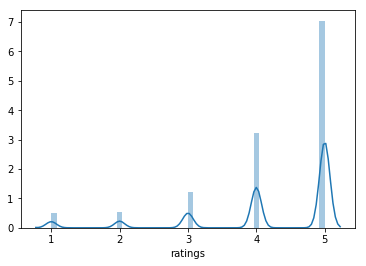

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(usable_amazon_data.ratings)


In [11]:
usable_amazon_data.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [12]:
# Split dat for training and test

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(usable_amazon_data, test_size = 0.30, random_state=0)

In [13]:
# #usable_amazon_data.groupby('productId').agg({'ratings': 'sum'}).reset_index()
import Recommenders

rc = Recommenders.popularity_recommender_py()
rc.create(train_data, 'userId', 'productId')



========================= Index(['productId', 'userId'], dtype='object')


In [14]:
rc.recommend('A18A5VSD0IPN14')

,userId,productId,score,Rank
30197,A18A5VSD0IPN14,B0088CJT4U,150,1.0
19162,A18A5VSD0IPN14,B003ES5ZUU,130,2.0
8448,A18A5VSD0IPN14,B000N99BBC,112,3.0
29619,A18A5VSD0IPN14,B007WTAJTO,104,4.0
29901,A18A5VSD0IPN14,B00829TIEK,104,5.0
29897,A18A5VSD0IPN14,B00829THK0,94,6.0
16945,A18A5VSD0IPN14,B002R5AM7C,85,7.0
22207,A18A5VSD0IPN14,B004CLYEDC,83,8.0
30455,A18A5VSD0IPN14,B008DWCRQW,82,9.0
17122,A18A5VSD0IPN14,B002SZEOLG,79,10.0


In [15]:
rc.recommend('AC9QEWWN4W9MC')

,userId,productId,score,Rank
30197,AC9QEWWN4W9MC,B0088CJT4U,150,1.0
19162,AC9QEWWN4W9MC,B003ES5ZUU,130,2.0
8448,AC9QEWWN4W9MC,B000N99BBC,112,3.0
29619,AC9QEWWN4W9MC,B007WTAJTO,104,4.0
29901,AC9QEWWN4W9MC,B00829TIEK,104,5.0
29897,AC9QEWWN4W9MC,B00829THK0,94,6.0
16945,AC9QEWWN4W9MC,B002R5AM7C,85,7.0
22207,AC9QEWWN4W9MC,B004CLYEDC,83,8.0
30455,AC9QEWWN4W9MC,B008DWCRQW,82,9.0
17122,AC9QEWWN4W9MC,B002SZEOLG,79,10.0


### As per above analysis we can see that the model is recommending top 10 products popular among users

In [52]:
usable_amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 118 to 7824444
Data columns (total 3 columns):
userId       122171 non-null object
productId    122171 non-null object
ratings      122171 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


### Using Recommenders.py file item similarity

In [50]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'productId')

In [51]:
is_model.recommend('A18A5VSD0IPN14')

No. of unique songs for the user: 38
no. of unique songs in the training set: 37385
Non zero values in cooccurence_matrix :12846


,userId,movieId,score,rank
0,A18A5VSD0IPN14,B007C6ZN3Y,0.026316,1
1,A18A5VSD0IPN14,B001OI2LV8,0.026316,2
2,A18A5VSD0IPN14,B003EEK03Q,0.026316,3
3,A18A5VSD0IPN14,B001E71GU6,0.026316,4
4,A18A5VSD0IPN14,B009W7ZVS8,0.026316,5
5,A18A5VSD0IPN14,B005F79DC4,0.026316,6
6,A18A5VSD0IPN14,B003CHOGCQ,0.026316,7
7,A18A5VSD0IPN14,B00BKNMPHW,0.026316,8
8,A18A5VSD0IPN14,B008YYT1IG,0.026316,9
9,A18A5VSD0IPN14,B006CO2UYW,0.026316,10


### You Can see the predictions of movie based on collabrative approach